In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [29]:
df = pd.read_csv("C:\\Users\\rahat\\Downloads\\city_population.csv")
df

,Name,Abbr.,Division,Established,Native,Area (km2),Population_1991,Population_2001,Population_2011,Population_2022
0,Barguna,BRG,Barisal,1984,বরগুনা জেলা,1831,805000,887376,927889,1035596
1,Barishal,BRS,Barisal,1797,বরিশাল জেলা,2785,2299000,2465249,2414729,2634203
2,Bhola,BHO,Barisal,1984,ভোলা জেলা,3403,1532000,1781043,1846351,1980452
3,Jhalokati,JHA,Barisal,1984,ঝালকাঠি জেলা,707,694000,726182,709914,677559
4,Patuakhali,PAT,Barisal,1969,পটুয়াখালী জেলা,3221,1323000,1527628,1596223,1770096
...,...,...,...,...,...,...,...,...,...,...
59,Thakurgaon,THA,Rangpur,1984,ঠাকুরগাঁও জেলা,1782,1059000,1270081,1444783,1569529
60,Habiganj,HAB,Sylhet,1984,হবিগঞ্জ জেলা,2637,1612000,1838683,2171065,2440151
61,Moulvibazar,MAU,Sylhet,1984,মৌলভীবাজার জেলা,2799,1454000,1686631,1994252,2196601
62,Sunamganj,SUN,Sylhet,1984,সুনামগঞ্জ জেলা,3747,1802000,2107281,2564540,2788358


In [30]:
df.shape

(64, 10)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             64 non-null     object
 1   Abbr.            64 non-null     object
 2   Division         64 non-null     object
 3   Established      64 non-null     int64 
 4   Native           64 non-null     object
 5   Area (km2)       64 non-null     int64 
 6   Population_1991  64 non-null     int64 
 7   Population_2001  64 non-null     int64 
 8   Population_2011  64 non-null     int64 
 9   Population_2022  64 non-null     int64 
dtypes: int64(6), object(4)
memory usage: 5.1+ KB


In [32]:
df.duplicated().sum()

np.int64(0)

In [33]:
df.isnull().sum()

Name               0
Abbr.              0
Division           0
Established        0
Native             0
Area (km2)         0
Population_1991    0
Population_2001    0
Population_2011    0
Population_2022    0
dtype: int64

In [34]:
df.drop(columns= ['Abbr.', 'Native'], inplace= True)
df.head(5)

,Name,Division,Established,Area (km2),Population_1991,Population_2001,Population_2011,Population_2022
0,Barguna,Barisal,1984,1831,805000,887376,927889,1035596
1,Barishal,Barisal,1797,2785,2299000,2465249,2414729,2634203
2,Bhola,Barisal,1984,3403,1532000,1781043,1846351,1980452
3,Jhalokati,Barisal,1984,707,694000,726182,709914,677559
4,Patuakhali,Barisal,1969,3221,1323000,1527628,1596223,1770096


In [35]:
df.drop(columns='Established').describe().T

,count,mean,std,min,25%,50%,75%,max
Area (km2),64.0,2.306000e+03,1.184493e+03,684.0,1379.25,2084.0,2960.75,6116.0
Population_1991,64.0,1.741500e+06,1.086475e+06,246000.0,1102250.00,1545500.0,2160750.00,6164000.0
Population_2001,64.0,2.039416e+06,1.415458e+06,311741.0,1213935.25,1829092.5,2474169.75,9151343.0
Population_2011,64.0,2.340193e+06,1.811774e+06,404091.0,1283515.75,2008954.5,2745524.50,12517360.0
Population_2022,64.0,2.653577e+06,2.203057e+06,495252.0,1430418.50,2215751.5,3020196.25,15210851.0


In [36]:
df['Density_1991'] = df['Population_1991'] / df['Area (km2)']
df['Density_2001'] = df['Population_2001'] / df['Area (km2)']
df['Density_2011'] = df['Population_2011'] / df['Area (km2)']
df['Density_2022'] = df['Population_2022'] / df['Area (km2)']
df.head(5)

,Name,Division,Established,Area (km2),Population_1991,Population_2001,Population_2011,Population_2022,Density_1991,Density_2001,Density_2011,Density_2022
0,Barguna,Barisal,1984,1831,805000,887376,927889,1035596,439.650464,484.640087,506.766248,565.590388
1,Barishal,Barisal,1797,2785,2299000,2465249,2414729,2634203,825.493716,885.188151,867.048115,945.853860
2,Bhola,Barisal,1984,3403,1532000,1781043,1846351,1980452,450.191008,523.374376,542.565677,581.972377
3,Jhalokati,Barisal,1984,707,694000,726182,709914,677559,981.612447,1027.131542,1004.121641,958.357850
4,Patuakhali,Barisal,1969,3221,1323000,1527628,1596223,1770096,410.742006,474.271344,495.567526,549.548587


     Division         mean         min           max           sum
0     Barisal   760.355487  549.548587    960.809859   4562.132922
1  Chattogram  1185.806396  108.997220   2032.700254  13043.870359
2       Dhaka  2490.246696  910.079646  10389.925546  32373.207046
3      Khulna   911.598980  416.740086   1366.520199   9115.989797
4  Mymensingh  1151.663967  860.130637   1387.443458   4606.655866
5    Rajshahi  1139.779937  827.974680   1428.161116   9118.239493
6     Rangpur  1116.643295  859.254093   1384.085326   8933.146360
7      Sylhet   902.535450  744.157459   1155.852549   3610.141801


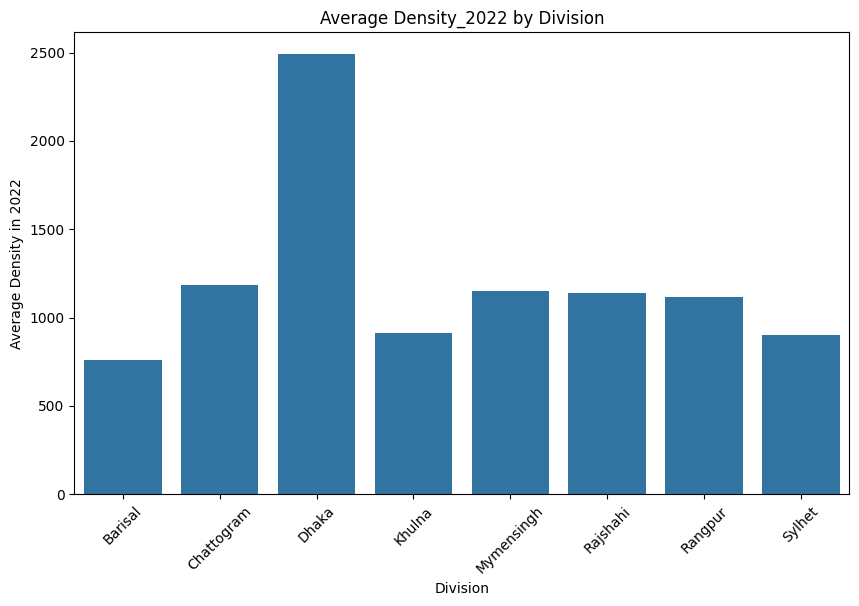

In [48]:
df_grouped = df.groupby('Division')['Density_2022'].agg(['mean', 'min', 'max', 'sum']).reset_index()
print(df_grouped)
plt.figure(figsize=(10, 6))
sns.barplot(x='Division', y='mean', data=df_grouped)
plt.xlabel('Division')
plt.ylabel('Average Density in 2022')
plt.title('Average Density_2022 by Division')
plt.xticks(rotation=45)
plt.show()

In [38]:
years = ['1991', '2001', '2011', '2022']
Division_population = df.groupby('Division')[[f'Population_{year}' for year in years]].sum()
print(Division_population)

            Population_1991  Population_2001  Population_2011  Population_2022
Division                                                                      
Barisal             7757000          8549026          8652321          9325821
Chattogram         21865000         25505197         29553855         34178611
Dhaka              24931000         30806667         37893924         45644586
Khulna             13243000         15418650         16309307         17813219
Mymensingh          9010000         10321282         11427765         12637472
Rajshahi           14917000         17129332         19225903         20794019
Rangpur            12583000         14484503         16412281         18020072
Sylhet              7150000          8307941         10296996         11415113


C:\Users\rahat\AppData\Local\Temp\ipykernel_15828\26643760.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=f'Population_{year}', y='Division', data=division_population_year, palette='viridis')
C:\Users\rahat\AppData\Local\Temp\ipykernel_15828\26643760.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=f'Population_{year}', y='Division', data=division_population_year, palette='viridis')
C:\Users\rahat\AppData\Local\Temp\ipykernel_15828\26643760.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=f'Population_{year}', y='Division', 

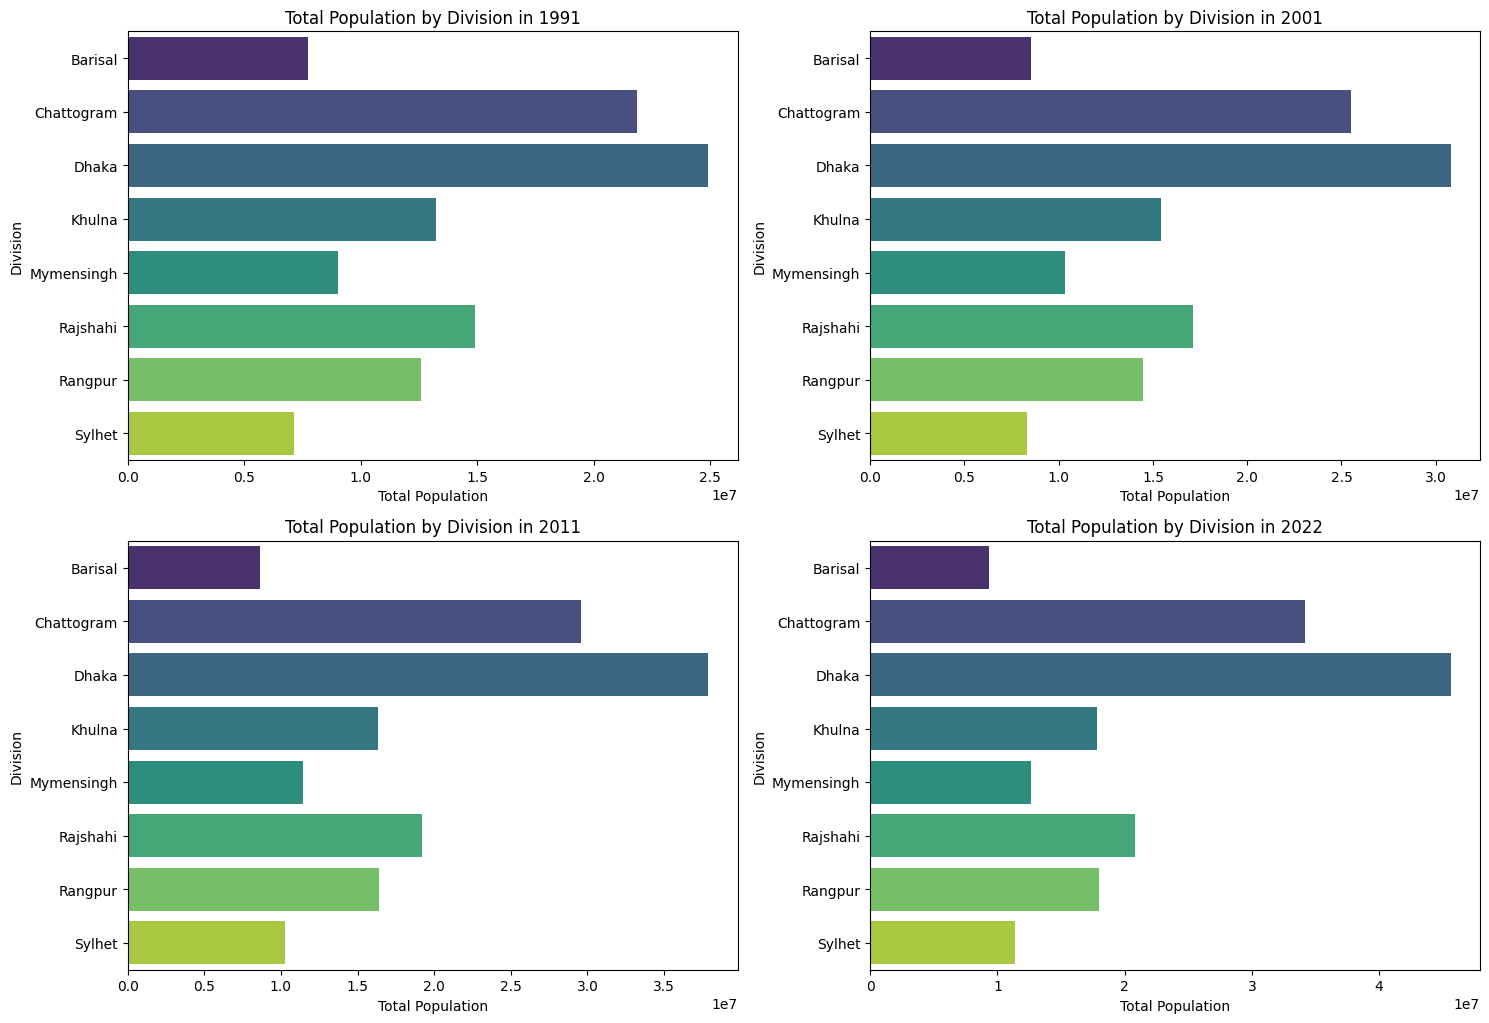

In [ ]:
plt.figure(figsize=(15, 15))
for i, year in enumerate(years):
    plt.subplot(3, 2, i + 1)
    division_population_year = df.groupby('Division')[f'Population_{year}'].sum().reset_index()
    sns.barplot(x=f'Population_{year}', y='Division', data=division_population_year, palette='viridis')
    plt.title(f'Total Population by Division in {year}')
    plt.xlabel('Total Population')
    plt.ylabel('Division')
plt.tight_layout()
plt.show()

In [42]:
df.head(5)

,Name,Division,Established,Area (km2),Population_1991,Population_2001,Population_2011,Population_2022,Density_1991,Density_2001,Density_2011,Density_2022
0,Barguna,Barisal,1984,1831,805000,887376,927889,1035596,439.650464,484.640087,506.766248,565.590388
1,Barishal,Barisal,1797,2785,2299000,2465249,2414729,2634203,825.493716,885.188151,867.048115,945.853860
2,Bhola,Barisal,1984,3403,1532000,1781043,1846351,1980452,450.191008,523.374376,542.565677,581.972377
3,Jhalokati,Barisal,1984,707,694000,726182,709914,677559,981.612447,1027.131542,1004.121641,958.357850
4,Patuakhali,Barisal,1969,3221,1323000,1527628,1596223,1770096,410.742006,474.271344,495.567526,549.548587


In [43]:
df2 = df.drop(columns= ['Density_1991', 'Density_2001', 'Density_2011', 'Density_2022'])
df2

,Name,Division,Established,Area (km2),Population_1991,Population_2001,Population_2011,Population_2022
0,Barguna,Barisal,1984,1831,805000,887376,927889,1035596
1,Barishal,Barisal,1797,2785,2299000,2465249,2414729,2634203
2,Bhola,Barisal,1984,3403,1532000,1781043,1846351,1980452
3,Jhalokati,Barisal,1984,707,694000,726182,709914,677559
4,Patuakhali,Barisal,1969,3221,1323000,1527628,1596223,1770096
...,...,...,...,...,...,...,...,...
59,Thakurgaon,Rangpur,1984,1782,1059000,1270081,1444783,1569529
60,Habiganj,Sylhet,1984,2637,1612000,1838683,2171065,2440151
61,Moulvibazar,Sylhet,1984,2799,1454000,1686631,1994252,2196601
62,Sunamganj,Sylhet,1984,3747,1802000,2107281,2564540,2788358


In [ ]:
years = np.array([1991, 2001, 2011, 2022]).reshape(-1, 1)
df2['Population_2032'] = np.nan
for i in range(df2.shape[0]):
    populations = df2.loc[i, ['Population_1991', 'Population_2001', 'Population_2011', 'Population_2022']].values.reshape(-1, 1)
    model = LinearRegression().fit(years, populations)
    pop_2032 = model.predict(np.array([[2032]]))
    df2.at[i, 'Population_2032'] = int(round(pop_2032[0][0]))

In [45]:
df2

,Name,Division,Established,Area (km2),Population_1991,Population_2001,Population_2011,Population_2022,Population_2032
0,Barguna,Barisal,1984,1831,805000,887376,927889,1035596,1097509.0
1,Barishal,Barisal,1797,2785,2299000,2465249,2414729,2634203,2693759.0
2,Bhola,Barisal,1984,3403,1532000,1781043,1846351,1980452,2136647.0
3,Jhalokati,Barisal,1984,707,694000,726182,709914,677559,684821.0
4,Patuakhali,Barisal,1969,3221,1323000,1527628,1596223,1770096,1906721.0
...,...,...,...,...,...,...,...,...,...
59,Thakurgaon,Rangpur,1984,1782,1059000,1270081,1444783,1569529,1761099.0
60,Habiganj,Sylhet,1984,2637,1612000,1838683,2171065,2440151,2719390.0
61,Moulvibazar,Sylhet,1984,2799,1454000,1686631,1994252,2196601,2465564.0
62,Sunamganj,Sylhet,1984,3747,1802000,2107281,2564540,2788358,3167222.0


            Population_2022  Population_2032
Division                                    
Barisal             9325821        9774419.0
Chattogram         34178611       38029594.0
Dhaka              45644586       52137677.0
Khulna             17813219       19340767.0
Mymensingh         12637472       13844176.0
Rajshahi           20794019       22936867.0
Rangpur            18020072       19927731.0
Sylhet             11415113       12981910.0


<Figure size 1000x600 with 0 Axes>

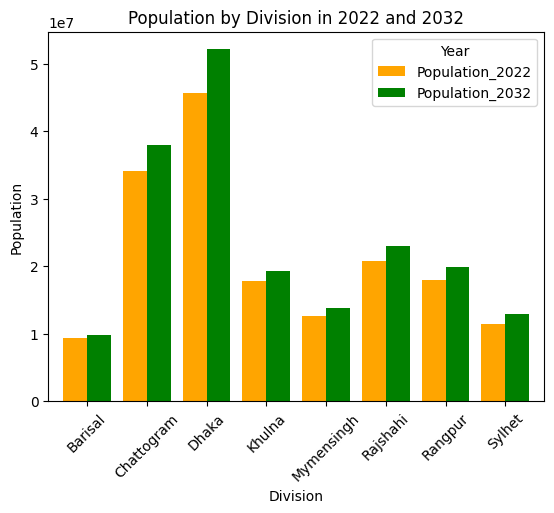

In [46]:
years = ['2022', '2032']
Division_population = df2.groupby('Division')[[f'Population_{year}' for year in years]].sum()
print(Division_population)
plt.figure(figsize=(10, 6))
Division_population.plot(kind='bar', width=0.8, color=['orange', 'green'])
plt.title("Population by Division in 2022 and 2032")
plt.xlabel("Division")
plt.ylabel("Population")
plt.xticks(rotation=45)
plt.legend(title="Year")
plt.show()